Web Scraping of yahoo Financial stats "https://uk.finance.yahoo.com/" by using **pandas datareader** and **yahoo_fin packages**

### Step 1) Import libraries

In [11]:
## Import all the libraries
import pandas as pd
from pandas_datareader import data

In [ ]:
##Now requires headers, pandas and pandas-datareader must be updated. Other libraries working with pdr might give you issues until gets updated or you modify the part of the code which retreives data.

!pip install --upgrade pandas-datareader

In [12]:
## Create variables for the sources
start_date = '2010-01-01'
end_date = '2020-01-01'


In [13]:
## Create dataframe
## name extracted from yahoo finance for Apple 
df = data.DataReader('aapl', data_source='yahoo' , start=start_date, end=end_date )


In [14]:
## View the data -earliest
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2010-01-04,7.660714,7.585000,7.622500,7.643214,493729600.0,6.526021
2010-01-05,7.699643,7.616071,7.664286,7.656429,601904800.0,6.537303
2010-01-06,7.686786,7.526786,7.656429,7.534643,552160000.0,6.433319
2010-01-07,7.571429,7.466071,7.562500,7.520714,477131200.0,6.421426
2010-01-08,7.571429,7.466429,7.510714,7.570714,447610800.0,6.464118


In [15]:
## View the data -latest
df.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-12-24,71.222504,70.730003,71.172501,71.067497,48478800.0,69.738724
2019-12-26,72.495003,71.175003,71.205002,72.477501,93121200.0,71.122368
2019-12-27,73.492500,72.029999,72.779999,72.449997,146266000.0,71.095367
2019-12-30,73.172501,71.305000,72.364998,72.879997,144114400.0,71.517326
2019-12-31,73.419998,72.379997,72.482498,73.412498,100805600.0,72.039879


### 2) Yahoo_Fin open source packages to extract stock info

In [ ]:
##Use yahoo_fin packages
!pip install yahoo_fin

In [ ]:
## install requests_html packages
! pip install requests_html

In [2]:
#load library
from yahoo_fin import stock_info as si


In [3]:
#Pull data from yahoo finance
#get the live price
si.get_live_price('aapl')

140.67010498046875

In [5]:
#round the price
round(si.get_live_price('aapl'))

141

In [7]:
#round the price with one decimal
round(si.get_live_price('aapl'), 0)

141.0

In [ ]:
#Extract income statement
si.get_income_statement('aapl', yearly=True)

In [ ]:
##Extract analyst info
si.get_analysts_info('aapl')

In [ ]:
## extract dividens info
si.get_dividends('aapl', start_date=start_date, end_date=end_date)

In [17]:
## create a dtaframe for visualisation
df = si.get_dividends('aapl', start_date=start_date, end_date=end_date)

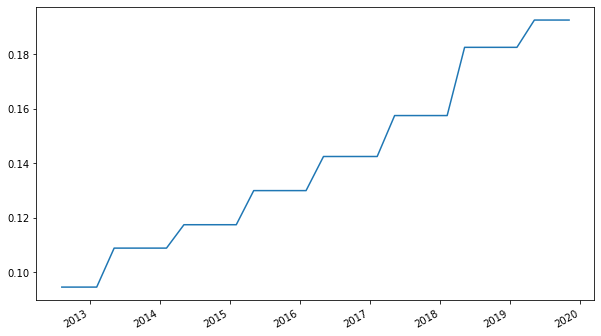

In [18]:
##plot chart
df['dividend'].plot(kind='line', figsize=(10,6))


In [19]:
## Extract holders info
si.get_holders('aapl')

{'Major Holders':         0                                      1
 0   0.07%        % of Shares Held by All Insider
 1  59.58%       % of Shares Held by Institutions
 2  59.62%        % of Float Held by Institutions
 3    5455  Number of Institutions Holding Shares,
 'Direct Holders (Forms 3 and 4)':                           Holder      Shares Date Reported  % Out         Value
 0     Vanguard Group, Inc. (The)  1277319054  Jun 29, 2022  7.95%  179271737025
 1                 Blackrock Inc.  1028688317  Jun 29, 2022  6.40%  144376411569
 2        Berkshire Hathaway, Inc   894802319  Jun 29, 2022  5.57%  125585510933
 3       State Street Corporation   598178524  Jun 29, 2022  3.72%   83954359494
 4                       FMR, LLC   344317974  Jun 29, 2022  2.14%   48325029752
 5  Geode Capital Management, LLC   278256192  Jun 29, 2022  1.73%   39053258245
 6  Price (T.Rowe) Associates Inc   237910783  Jun 29, 2022  1.48%   33390779846
 7                 Morgan Stanley   182450565  Jun